<a href="https://colab.research.google.com/github/leeseunghwan0409/AIFFEL_Online_Quest/blob/main/Main_Quest03-02/Main_Quest03_02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 사용할 라이브러리 버전 확인
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.15.0
1.23.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 데이터 불러오기 + Resize 작업
from PIL import Image
import glob
import os

In [4]:
# 가위, 바위, 보 이미지 변경
def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

  print(len(images), " images resized.")

# 가위, 바위, 보 이미지가 각각 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_paths = ["/content/drive/MyDrive/Colab Notebooks/image_data/scissor",
                   "/content/drive/MyDrive/Colab Notebooks/image_data/rock",
                   "/content/drive/MyDrive/Colab Notebooks/image_data/paper"]

for image_dir_path in image_dir_paths:
  resize_images(image_dir_path)

print("가위, 바위, 보 이미지 resize 완료")

2000  images to be resized.


<ipython-input-4-3d0a88860562>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


2000  images resized.
2000  images to be resized.
2000  images resized.
2000  images to be resized.
2000  images resized.
가위, 바위, 보 이미지 resize 완료


In [5]:
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=6000): # 가위, 바위, 보 이미지 갯수
  # 가위 : 0, 바위 : 1, 보 : 2
  img_size=28
  color=3
  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬 (matrix) 영역을 생성
  imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels=np.zeros(number_of_data,dtype=np.int32)

  idx=0
  for file in glob.iglob(img_path+'/scissor/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=0   # 가위 : 0
      idx=idx+1

  for file in glob.iglob(img_path+'/rock/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=1   # 바위 : 1
      idx=idx+1

  for file in glob.iglob(img_path+'/paper/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=2   # 보 : 2
      idx=idx+1

  print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
  return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/image_data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6000 입니다.
x_train shape: (6000, 28, 28, 3)
y_train shape: (6000,)


라벨:  0


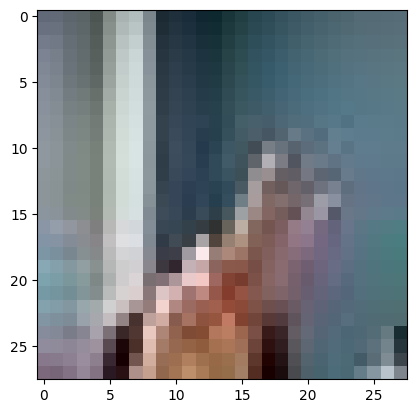

In [6]:
# 라벨링 된 이미지 확인
plt.imshow(x_train[1])
print('라벨: ', y_train[0])

In [7]:
# 딥러닝 네트워크 설계해보기
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import numpy as np

# model을 직접 만들어 보세요.
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 각 데이터별로 채널 수 추가해주기
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)
print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")

Model에 추가된 Layer 개수:  10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (N

In [8]:
# 딥러닝 네트워크 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.optimizer.learning_rate = 0.01
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
188/188 [==============================] - 5s 19ms/step - loss: 0.4513 - accuracy: 0.7973
Epoch 2/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0965 - accuracy: 0.9668
Epoch 3/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0661 - accuracy: 0.9795
Epoch 4/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0773 - accuracy: 0.9758
Epoch 5/10
188/188 [==============================] - 3s 19ms/step - loss: 0.0507 - accuracy: 0.9870
Epoch 6/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0466 - accuracy: 0.9872
Epoch 7/10
188/188 [==============================] - 4s 24ms/step - loss: 0.0593 - accuracy: 0.9828
Epoch 8/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0717 - accuracy: 0.9800
Epoch 9/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0498 - accuracy: 0.9872
Epoch 10/10
188/188 [==============================] - 4s 23ms/step - loss: 0.0445 - accura

In [9]:
# 가위, 바위, 보 이미지 변경
def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")

  print(len(images), " images resized.")

# 가위, 바위, 보 이미지가 각각 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_paths = ["/content/drive/MyDrive/Colab Notebooks/image_data/최강훈_data/scissor",
                   "/content/drive/MyDrive/Colab Notebooks/image_data/최강훈_data/rock",
                   "/content/drive/MyDrive/Colab Notebooks/image_data/최강훈_data/paper"]

for image_dir_path in image_dir_paths:
  resize_images(image_dir_path)

print("가위, 바위, 보 이미지 resize 완료")

100  images to be resized.


<ipython-input-9-b1dabff47f0c>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
가위, 바위, 보 이미지 resize 완료


In [10]:
def load_data(img_path, number_of_data=300): # 가위, 바위, 보 이미지 갯수
  # 가위 : 0, 바위 : 1, 보 : 2
  img_size=28
  color=3
  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬 (matrix) 영역을 생성
  imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels=np.zeros(number_of_data,dtype=np.int32)

  idx=0
  for file in glob.iglob(img_path+'/scissor/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=0   # 가위 : 0
      idx=idx+1

  for file in glob.iglob(img_path+'/rock/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=1   # 바위 : 1
      idx=idx+1

  for file in glob.iglob(img_path+'/paper/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=2   # 보 : 2
      idx=idx+1

  print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
  return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/image_data/최강훈_data"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 3)

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


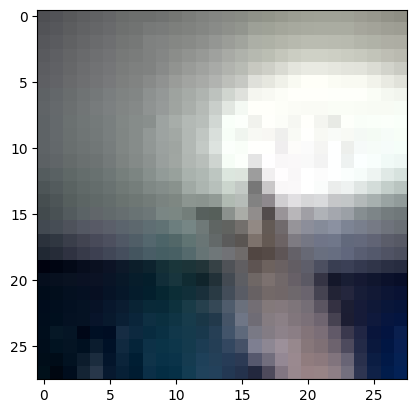

In [11]:
# 라벨링 된 이미지 확인
plt.imshow(x_test[1])
print('라벨: ', y_test[0])

In [12]:
# 테스트 데이터로 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.0832 - accuracy: 0.4533 - 191ms/epoch - 19ms/step
test_loss: 2.0832324028015137
test_accuracy: 0.4533333480358124
